# Spherical Pendulum

After solving Euler-Lagrange Equation, we end up with
\begin{equation} \label{1} \tag{1}
\boxed{\ddot \theta = \sin{\theta} \cos{\theta} \dot \phi^2 - \frac{g}{l}\sin{\theta}} 
\end{equation}
and, 
\begin{equation} \label{2} \tag{2}
\boxed{\ddot \phi = -\frac{2\cos{\theta}}{\sin{\theta}}\dot \phi \dot \theta} 
\end{equation}

I broke these equation in four simulataneous DE.
For the equation \ref{1}
\begin{align}
\boxed{\frac{d \theta}{dt}= \omega} && \boxed{\frac{d \omega}{dt} = \sin{\theta} \cos{\theta}  \delta^2 - \frac{g}{l}\sin{\theta}}
\end{align}
and \ref{2}
\begin{align}
\boxed{\frac{d \phi}{dt}= \delta} && \boxed{\frac{d \delta}{dt} = -\frac{2\cos{\theta}}{\sin{\theta}}\delta \omega}
\end{align}

But for implimanting them in python I suppose
$\omega $=w; $\delta$=o; $\theta$=theta; $\phi$=phi

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, pi, sqrt, exp
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
ti = 0; tf = 20; theta = pi/6; phi = pi/18; w = 0; o = 1; h = 0.01

T, THETA, PHI = [ti], [theta], [phi]

while tf >= ti:
    theta += h*w
    w += h*(sin(theta)*cos(theta)*o**2 - sin(theta))
    phi += h*o
    o += h*(-2*cos(theta)*o*w/sin(theta))
    ti += h
    T.append(ti)
    THETA.append(theta)
    PHI.append(phi)
    
tt = np.array(T)
phii = np.array(PHI)
thetaa = np.array(THETA)

x = sin(thetaa)*cos(phii)
y = sin(thetaa)*sin(phii)
z = cos(thetaa)

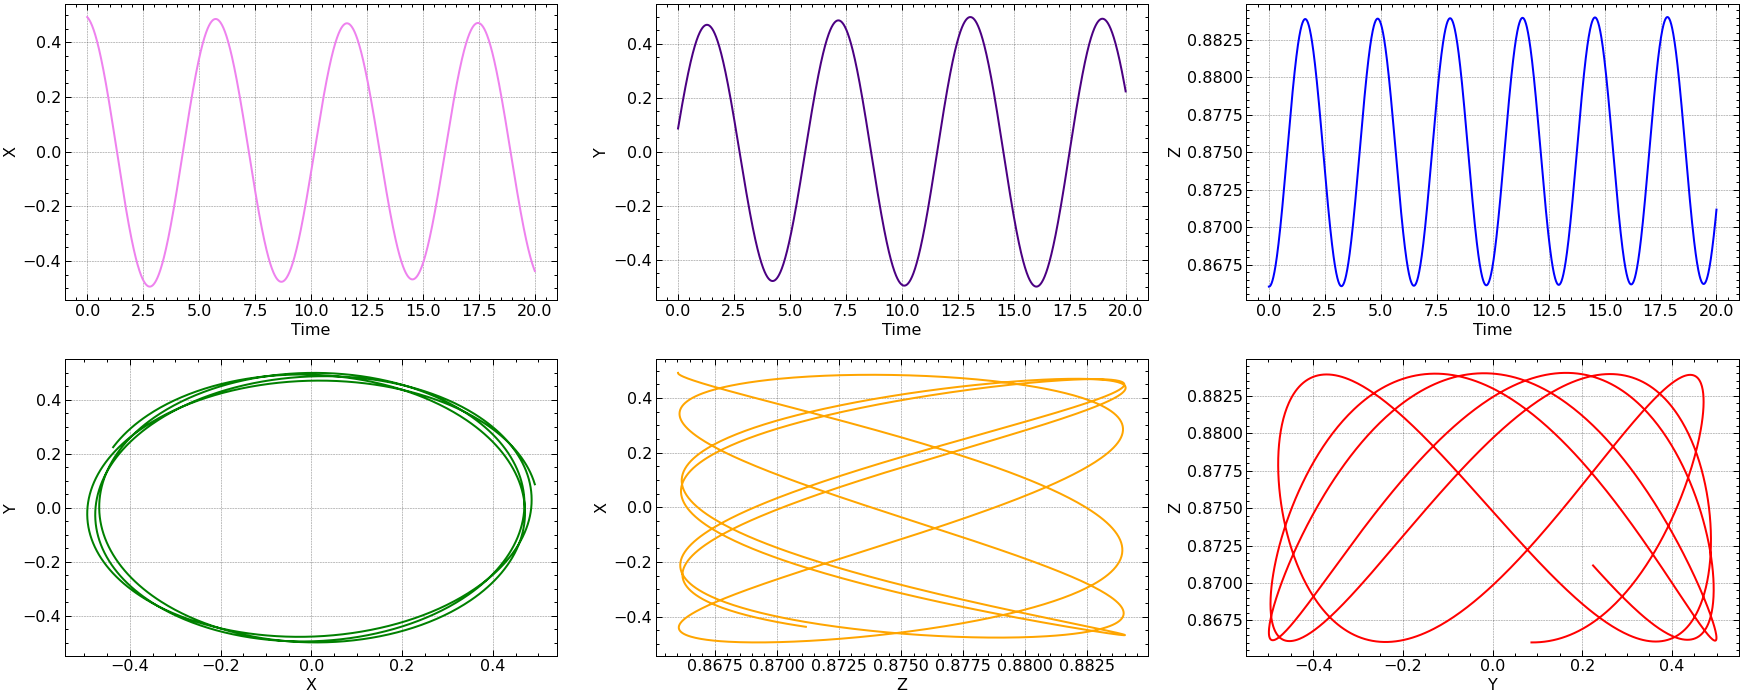

In [3]:
plt.figure(figsize = (30, 12))
plt.subplot(231)
plt.plot(tt, x, "violet")
plt.xlabel("Time")
plt.ylabel("X")
plt.subplot(232)
plt.plot(tt, y, "indigo")
plt.xlabel("Time")
plt.ylabel("Y")
plt.subplot(233)
plt.plot(tt, z,"blue")
plt.xlabel("Time")
plt.ylabel("Z")
plt.subplot(234)
plt.plot(x,y,"green")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(235)
plt.plot(z, x, "orange")
plt.xlabel("Z")
plt.ylabel("X")
plt.subplot(236)
plt.plot(y,z,"red")
plt.xlabel("Y")
plt.ylabel("Z")

plt.show()